In [1]:
import nibabel as nib # IRM image package
import matplotlib.pyplot as plt
from stripper.inference import Brook
from tqdm import tqdm
import numpy as np

In [2]:
mask_path = "../example/sub-A00028185_ses-NFB3_T1w_brainmask.nii.gz" # path to IRM ground truth
data_path = "../example/sub-A00028185_ses-NFB3_T1w.nii.gz" # path to IRM data (skull + brain)

In [3]:
data = nib.load(data_path).get_fdata() # Convert IRM format to numpy 3D tensor
label = nib.load(mask_path).get_fdata() # Convert IRM format to numpy 3D tensor

In [4]:
stripper = Brook() # Create an instance of brook

In [5]:
example_slice = data[120,:,:] # Get on slice of tensor 

In [6]:
brain,mask = stripper.strip(example_slice,pre_process=False,post_process=False) # Extract brain from the skull

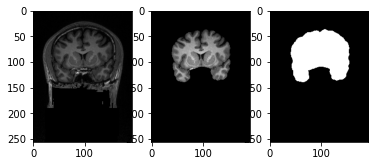

In [7]:
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(example_slice, cmap="gray")
axarr[1].imshow(brain, cmap="gray")
axarr[2].imshow(mask, cmap="gray")
plt.show()



In [8]:
segmented_tensor = []
for slice in tqdm(range(data.shape[1])):
    example_slice = data[:,slice,:]
    brain,mask = stripper.strip(example_slice,pre_process=False,post_process=False) # Extract brain from the skull
    segmented_tensor.append(brain)



100%|██████████| 256/256 [01:08<00:00,  3.76it/s]


In [9]:
segmented_tensor = np.stack(segmented_tensor,axis=1)

In [10]:
segmented_tensor.shape

(256, 256, 192)

In [16]:
segmented_tensor[:,30,:].shape

(256, 192)

In [23]:
f, axarr = plt.subplots(10)
for i in range(1,9):
    example_slice = segmented_tensor[:,30*i,:]
    axarr[0].imshow(example_slice, cmap="gray")
    plt.show()
    



AttributeError: 'numpy.ndarray' object has no attribute 'imshow'